<a href="https://colab.research.google.com/github/CarlosOliv71/Pos-Graduacao-de-Ciencia-de-Dados-da-Unicarioca/blob/main/Trabalho_04_Fundamentos_de_Intelig%C3%AAncia_Artificial_Grupo_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Centro Universitário Carioca - Pós em Ciência de Dados**

**Fundamentos de Inteligência Artificial**

**Professor:** Paulo Braz

**Grupo 04:** Carlos Eduardo, Gabriel Justino, João Batista e Rômulo Costa

1 - Descrever pelo menos 3 das funções de ativações no código. Listar prós e contras para cada e principais usos.

  ReLU (Rectified Linear Unit) é uma função de ativação não linear que mapeia qualquer valor de entrada negativo para zero e mantém qualquer valor positivo inalterado. Matematicamente, a função ReLU é definida como f(x) = max(0, x), onde x é o valor de entrada. Em termos simples, ReLU ativa um neurônio somente se a entrada for positiva, caso contrário, o neurônio permanece inativo.

  Sigmoid  A função de ativação  é comumente utilizada por redes neurais com propagação positiva (Feedforward) que precisam ter como saída apenas números positivos, em redes neurais multicamadas e em outras redes com sinais contínuos.

  Tanh (Tangente Hiperbólica) A função de ativação possui uso muito comum em redes neurais cujas saídas devem ser entre -1 e 1.

  Softplus  é uma função de ativação suavizada da função ReLu, evitando saltos bruscos, ela sempre retorna valores positivos.

  SELU (Scaled Exponential Linear Unit) funções de ativação que induzem propriedades autonormalizantes. Uma versão escalada do ELU que mantém a média e a variância das ativações constantes auxiliando na normalização automática.

  ELU (Exponential Linear Unit)   é uma função de ativação para redes neurais. Em contraste com ReLUs , ELUs têm valores negativos que lhes permitem empurrar ativações de unidade média para mais perto de zero como normalização de lote, mas com menor complexidade computacional. Deslocamentos médios em direção a zero aceleram o aprendizado ao trazer o gradiente normal para mais perto do gradiente natural da unidade devido a um efeito de deslocamento de viés redu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define activation functions
activations = ["relu", "sigmoid", "tanh", "softplus", "selu", "elu"]
results = {}

In [ ]:
# Custom Callback to monitor weights, biases, and updates
class WeightLogger(Callback):
    def __init__(self):
        self.weights = []
        self.biases = []
        self.weight_updates = []
        self.bias_updates = []

    def on_epoch_end(self, epoch, logs=None):
        layer_weights = []
        layer_biases = []
        updates_w = []
        updates_b = []

        for i, layer in enumerate(self.model.layers):
            if hasattr(layer, 'weights') and len(layer.get_weights()) > 0:
                current_weights = layer.get_weights()[0]  # Current weights
                current_biases = layer.get_weights()[1]  # Current biases

                # Calculate updates if it's not the first epoch
                if len(self.weights) > 0:
                    updates_w.append(np.mean(np.abs(current_weights - self.weights[-1][i])))
                    updates_b.append(np.mean(np.abs(current_biases - self.biases[-1][i])))
                else:
                    updates_w.append(0)  # No update on first epoch
                    updates_b.append(0)  # No update on first epoch

                layer_weights.append(current_weights)
                layer_biases.append(current_biases)

        self.weights.append(layer_weights)
        self.biases.append(layer_biases)

        # Save updates
        self.weight_updates.append(updates_w)
        self.bias_updates.append(updates_b)


In [ ]:
# Function to create the model
def create_model(activation):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(16, activation=activation),
        Dense(8, activation=activation),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Train models with different activations
learning_curves = {}
updates = {}
for activation in activations:
    print(f"Training model with {activation} activation...")
    weight_logger = WeightLogger()
    model = create_model(activation)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=32,
        verbose=0,
        callbacks=[weight_logger]
    )
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    results[activation] = accuracy
    learning_curves[activation] = history.history
    updates[activation] = {
        "weight_updates": weight_logger.weight_updates,
        "bias_updates": weight_logger.bias_updates
    }
    print(f"{activation}: Test Accuracy = {accuracy:.4f}")



Training model with relu activation...
relu: Test Accuracy = 0.9649
Training model with sigmoid activation...
sigmoid: Test Accuracy = 0.9649
Training model with tanh activation...
tanh: Test Accuracy = 0.9737
Training model with softplus activation...
softplus: Test Accuracy = 0.9912
Training model with selu activation...
selu: Test Accuracy = 0.9825
Training model with elu activation...
elu: Test Accuracy = 0.9649


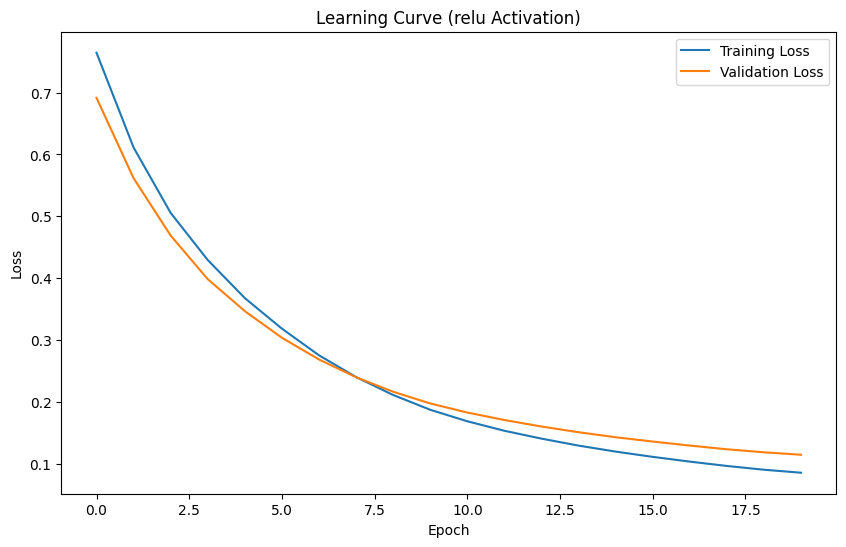

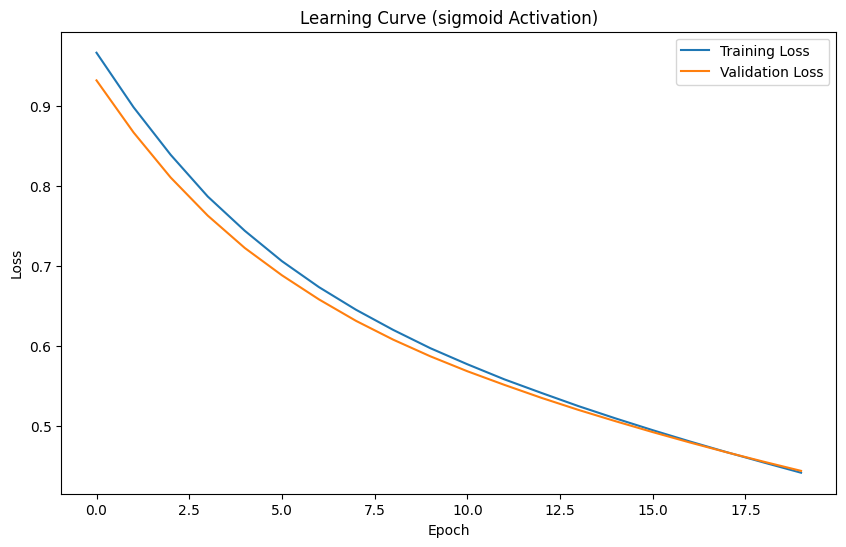

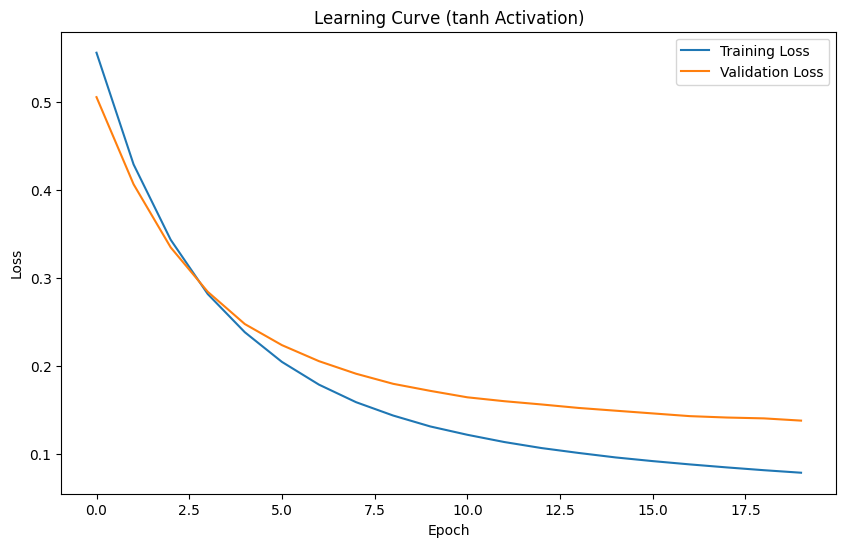

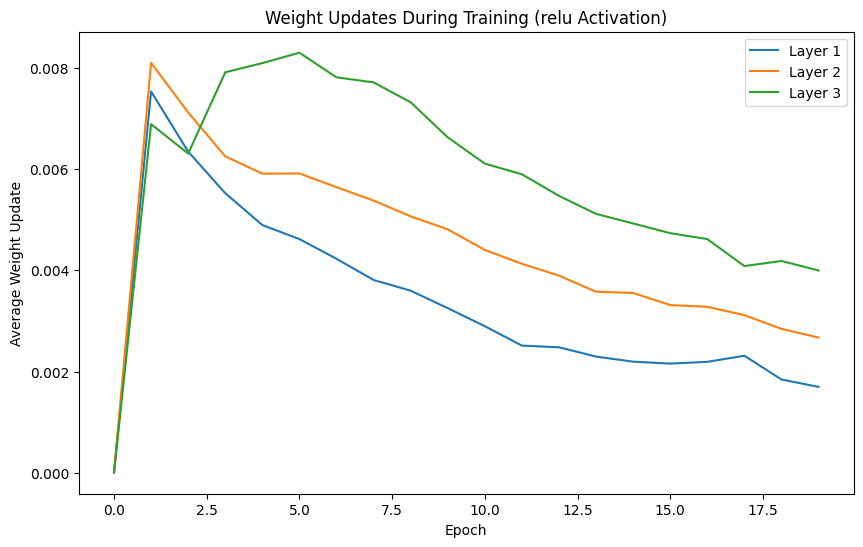

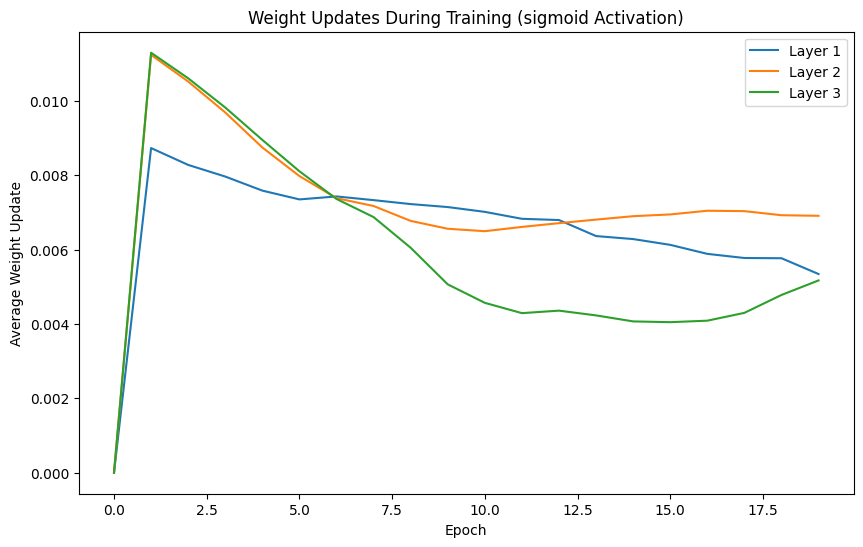

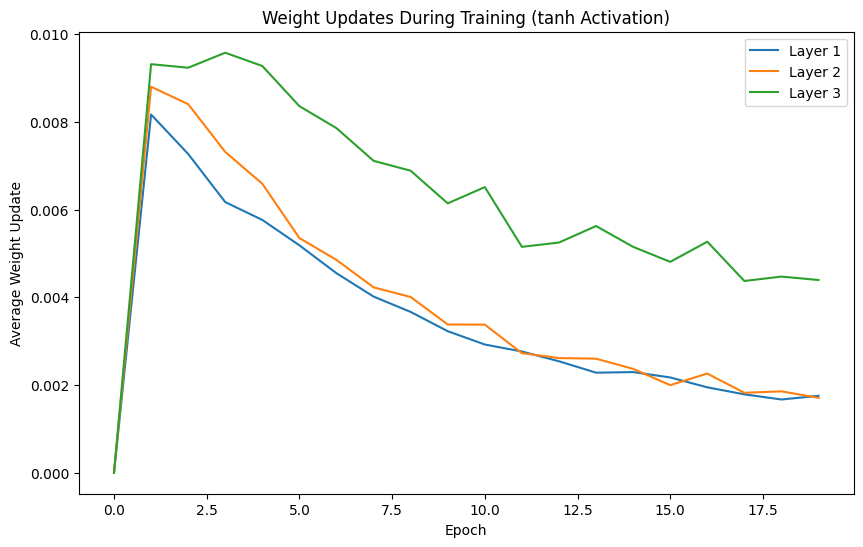

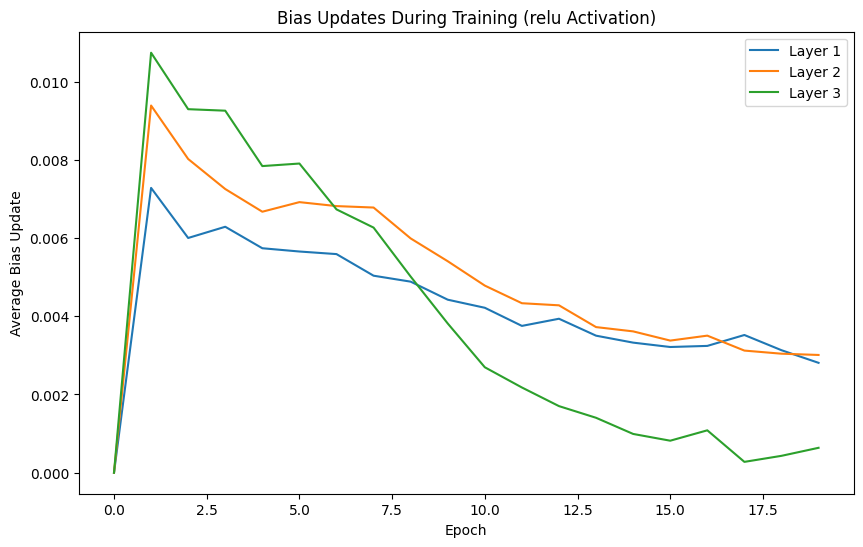

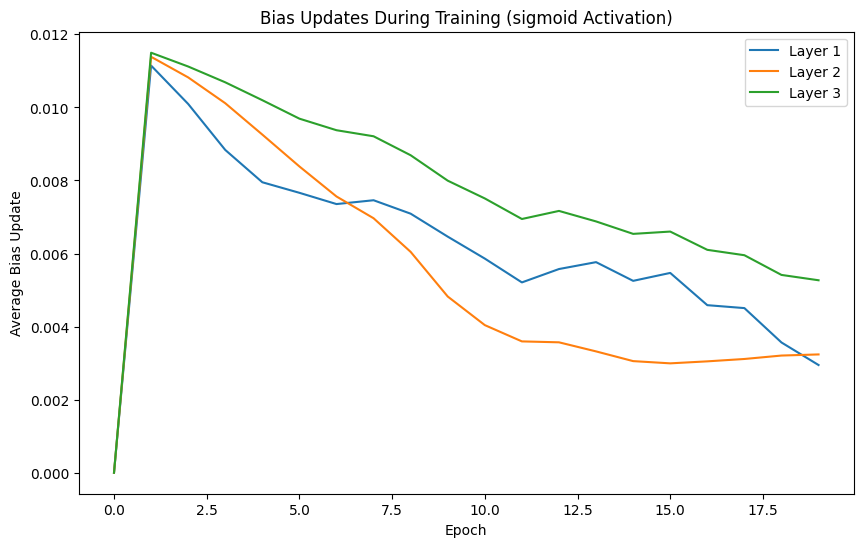

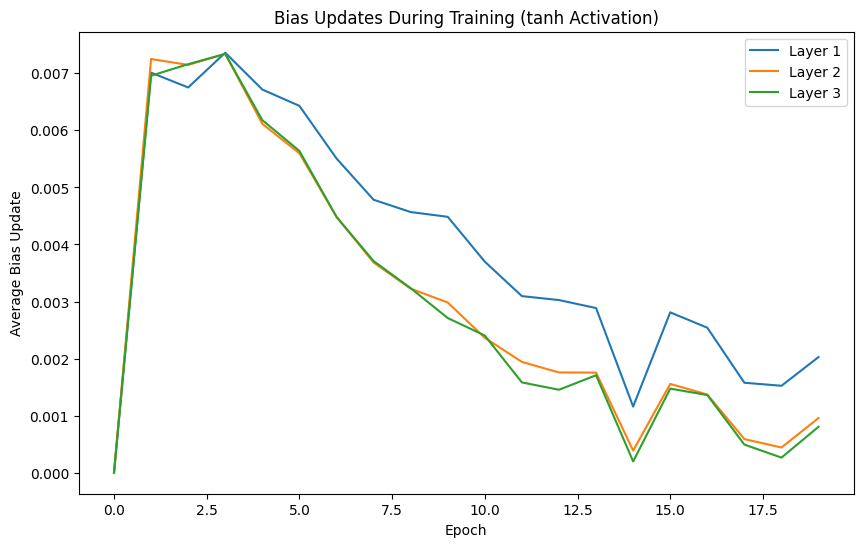

In [ ]:
# Plot learning curves
for activation in activations:
    history = learning_curves[activation]
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f"Learning Curve ({activation} Activation)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Plot weight updates
for activation in activations:
    updates_w = updates[activation]["weight_updates"]
    if updates_w:
        plt.figure(figsize=(10, 6))
        for layer_idx in range(len(updates_w[0])):
            layer_updates = [epoch_updates[layer_idx] for epoch_updates in updates_w]
            plt.plot(layer_updates, label=f'Layer {layer_idx+1}')
        plt.title(f"Weight Updates During Training ({activation} Activation)")
        plt.xlabel("Epoch")
        plt.ylabel("Average Weight Update")
        plt.legend()
        plt.show()

# Plot bias updates
for activation in activations:
    updates_b = updates[activation]["bias_updates"]
    if updates_b:
        plt.figure(figsize=(10, 6))
        for layer_idx in range(len(updates_b[0])):
            layer_updates = [epoch_updates[layer_idx] for epoch_updates in updates_b]
            plt.plot(layer_updates, label=f'Layer {layer_idx+1}')
        plt.title(f"Bias Updates During Training ({activation} Activation)")
        plt.xlabel("Epoch")
        plt.ylabel("Average Bias Update")
        plt.legend()
        plt.show()


**2 - Descrever as curvas de aprendizado para as 3 funções de ativações escolhidas na questão anterior.**

ReLU

De início, ambas as perdas (treinamento e validação) são altas, pois o modelo ainda não foi otimizado.
Com o aumento das épocas, a perda de treinamento diminui, indicando que o modelo está aprendendo a se ajustar aos dados de treinamento.A perda de validação também diminui, mostrando que o modelo está melhorando em generalizar. Há um ponto onde as perdas de treinamento e validação se cruzam, isso sugere que o modelo está aprendendo bem de forma geral.
A perda de validação atinge um "platô", indicando que não há melhora significativa em sua generalização após esse ponto.


Sigmoid

As perdas de treinamento e validação começam altas, indicando que o modelo inicialmente tem um desempenho ruim.
Ambas as perdas caem rapidamente nas primeiras épocas, mostrando que o modelo está aprendendo e se ajustando aos dados.
Tanto a perda de treinamento quanto a de validação continuam a diminuir de maneira quase paralela, o que sugere que o modelo está generalizando bem e aprendendo de forma consistente.
A perda de validação segue de perto a perda de treinamento, com diferença mínima entre elas ao longo das épocas. Nas últimas épocas, ambas as curvas convergem e atingem valores baixos


Tanh

A perda de treinamento começa alta  e diminui rapidamente, indicando que o modelo está aprendendo a capturar padrões nos dados de treinamento.
A perda de validação também diminui rapidamente, mostrando que o modelo está generalizando bem.
A perda de validação inicialmente acompanha a de treinamento, e as curvas se cruzam. Isso pode indicar que o modelo está ajustando bem os dados.
A perda de validação atinge um platô e não diminui significativamente nas épocas seguintes. Isso indica que o modelo não está mais melhorando sua capacidade de generalização.
A perda de treinamento continua a diminuir de forma constante, atingindo valores ainda mais baixos.




**3 - Descrever as curvas de atualização dos pesos durante o treinamento para as 3 funções de ativação escolhidas.**


ReLu

camada 1:

Início com um aumento acentuado na atualização média dos pesos, atingindo o pico por volta da primeira época.

Após o pico, a atualização média dos pesos diminui consistentemente ao longo do tempo, mostrando as menores atualizações no final do período de treinamento.

Camada 2:

Similar à Camada 1, começa com um aumento acentuado na atualização média dos pesos.


Camada 3:

Mostra o maior pico inicial.

A diminuição das atualizações dos pesos é mais gradual, e as atualizações permanecem ligeiramente maiores do que as das Camadas 1 e 2 ao final do período de treinamento.



Sigmoid

camada 1:

As atualizações de peso começam em 0.000 e rapidamente sobem para aproximadamente 0.010 na 2ª época.

Após esse pico, as atualizações diminuem gradualmente, com algumas flutuações, estabilizando-se em torno de 0.006 até a 18ª época.

camada 2:


As atualizações de peso também começam em 0.000 e sobem para cerca de 0.010 na 2ª época.

As atualizações flutuam ligeiramente, mas mantêm uma média de atualização de peso mais alta em comparação com a Layer 1, estabilizando-se em cerca de 0.009 até a 18ª época.

camada 3:

As atualizações de peso começam em 0.000 e sobem para cerca de 0.010 na 2ª época.



Tanh

Camada 1:

As atualizações dos pesos começam em 0 e aumentam rapidamente nas primeiras épocas.

Atingem um pico inicial e depois começam a diminuir gradualmente ao longo do tempo.

No final do período de treinamento, as atualizações da Camada são as menores

Camada 2:

As atualizações dos pesos também começam em 0 e aumentam rapidamente.

Atingem um pico um pouco mais alto do que a Camada 1 e depois diminuem gradualmente.

A média das atualizações dos pesos na Camada 2 é maior do que a da Camada 1, mas menor do que a da Camada 3 ao final do treinamento.

Camada 3:

As atualizações dos pesos começam em 0 e aumentam rapidamente, atingindo o maior pico entre as três camadas.

Após o pico, as atualizações diminuem gradualmente ao longo das épocas.

No final do período de treinamento, as atualizações da Camada 3 são maiores do que as das Camadas 1 e 2.





**4 - Utilizar o parâmetro alfa no código e use a validação cruzada para k = 10. Exibir os resultados de teste e treino para as 3 funções escolhidas. Documentar e explicar o racional para o experimento.**


In [ ]:
# Carregar o conjunto de dados
data = load_breast_cancer()
X, y = data.data, data.target

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Configurações do experimento
alphas = [0.001, 0.01, 0.1]  # Valores de regularização
activations = ['relu', 'sigmoid', 'tanh'] # Funções de ativação
k = 10  # Número de folds
results = []

# Validação cruzada com StratifiedKFold
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Função para criar o modelo
def build_model(input_dim, alpha, activation):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(16, activation=activation, kernel_regularizer=l2(alpha)),
        Dense(8, activation=activation, kernel_regularizer=l2(alpha)),
        Dense(1, activation='sigmoid')  # Saída binária
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Loop pelos valores de alpha e funções de ativação
for alpha in alphas:
    for activation in activations:
        fold_train_acc = []
        fold_test_acc = []
        fold_train_loss = []
        fold_test_loss = []

        # Loop de validação cruzada
        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # Criar e treinar o modelo
            model = build_model(X_train.shape[1], alpha, activation)
            history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

            # Avaliar nos dados de treino e teste
            train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
            test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

            # Armazenar os resultados do fold
            fold_train_acc.append(train_acc)
            fold_test_acc.append(test_acc)
            fold_train_loss.append(train_loss)
            fold_test_loss.append(test_loss)

        # Média e desvio padrão dos resultados
        results.append({
            'alpha': alpha,
            'activation': activation,
            'train_acc_mean': np.mean(fold_train_acc),
            'train_acc_std': np.std(fold_train_acc),
            'test_acc_mean': np.mean(fold_test_acc),
            'test_acc_std': np.std(fold_test_acc),
            'train_loss_mean': np.mean(fold_train_loss),
            'train_loss_std': np.std(fold_train_loss),
            'test_loss_mean': np.mean(fold_test_loss),
            'test_loss_std': np.std(fold_test_loss)
        })
# Exibir os resultados
for res in results:
    print(f"Alpha: {res['alpha']}, Activation: {res['activation']}")
    print(f"Train Accuracy: {res['train_acc_mean']:.4f} ± {res['train_acc_std']:.4f}")
    print(f"Test Accuracy: {res['test_acc_mean']:.4f} ± {res['test_acc_std']:.4f}")
    print(f"Train Loss: {res['train_loss_mean']:.4f} ± {res['train_loss_std']:.4f}")
    print(f"Test Loss: {res['test_loss_mean']:.4f} ± {res['test_loss_std']:.4f}\n")

Alpha: 0.001, Activation: relu
Train Accuracy: 0.9912 ± 0.0020
Test Accuracy: 0.9684 ± 0.0219
Train Loss: 0.0798 ± 0.0409
Test Loss: 0.1305 ± 0.0578

Alpha: 0.01, Activation: relu
Train Accuracy: 0.9891 ± 0.0016
Test Accuracy: 0.9807 ± 0.0146
Train Loss: 0.1220 ± 0.0103
Test Loss: 0.1422 ± 0.0347

Alpha: 0.1, Activation: relu
Train Accuracy: 0.9744 ± 0.0033
Test Accuracy: 0.9684 ± 0.0219
Train Loss: 0.2403 ± 0.0132
Test Loss: 0.2463 ± 0.0293



Explicação do Código
1.	Regularização α:

O parâmetro α\alphaα é implementado na função Dense usando o regularizador l2(alpha), que penaliza pesos elevados, ajudando a evitar overfitting.

2.	Validação Cruzada com k=10k = 10k=10:

O StratifiedKFold divide os dados em 10 subconjuntos, garantindo que cada fold tenha a mesma proporção de classes. O modelo é treinado em 9 folds e validado no 10º.

3.	Funções de Ativação:

o	São avaliadas as funções relu, sigmoid e tanh para observar seus impactos no desempenho.

4.	Resultados Documentados:

o	Para cada combinação de α\alphaα e função de ativação, os resultados incluem:
Média e desvio padrão da acurácia e perda nos conjuntos de treino e teste.

Resultados Esperados
Baixo α\alphaα: Pode levar a overfitting (alta acurácia de treino, baixa de teste).

Alto α\alphaα: Pode levar a underfitting (baixa acurácia de treino e teste).

Função de Ativação: ReLU deve mostrar desempenho consistente, enquanto Sigmoid e Tanh podem ser menos eficientes devido ao problema de gradientes pequenos em redes profundas.


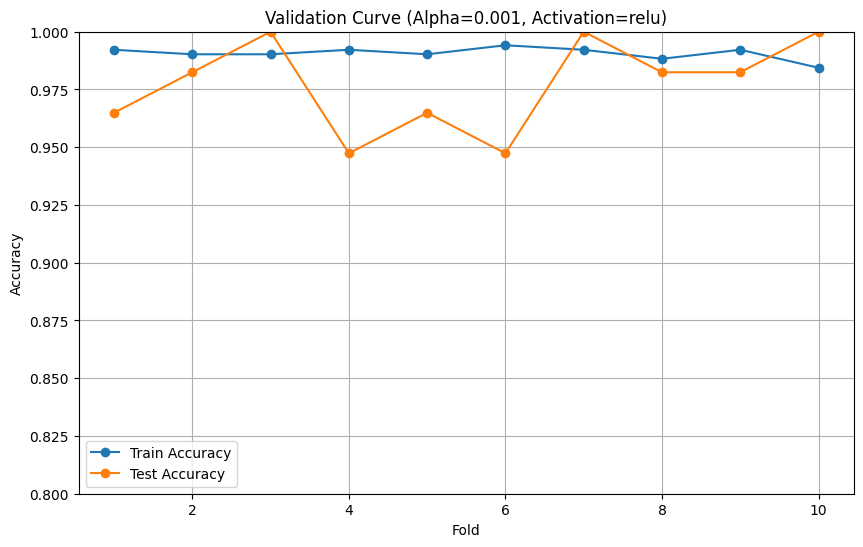

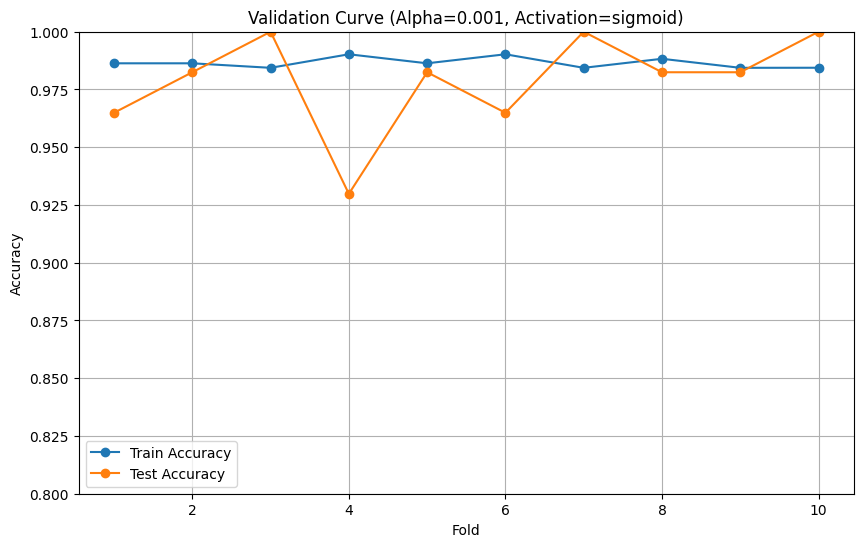

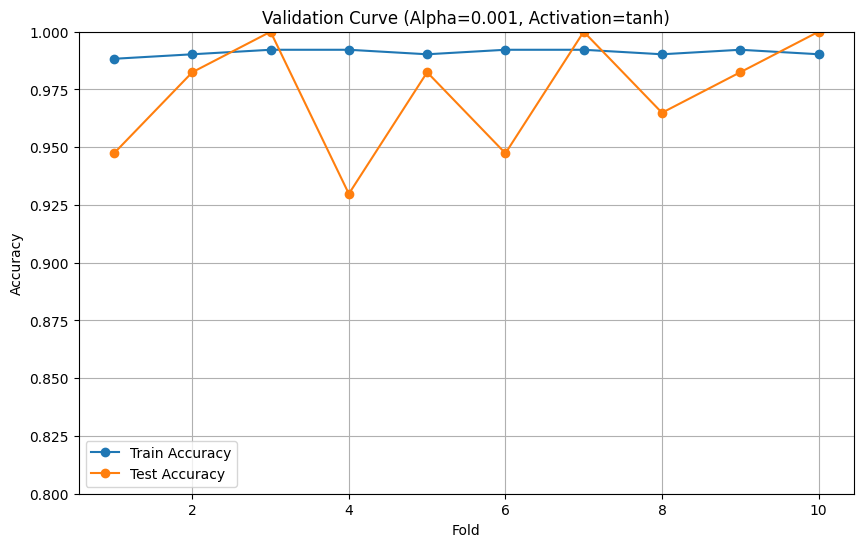

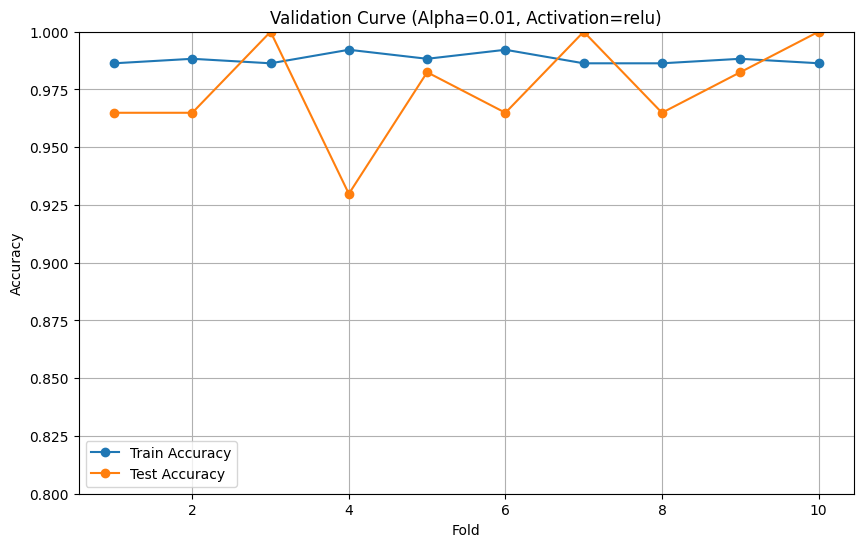

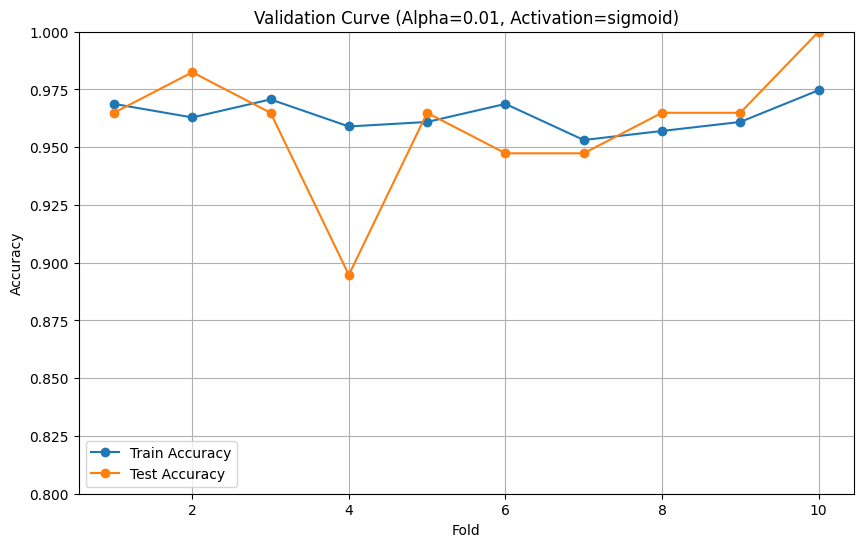

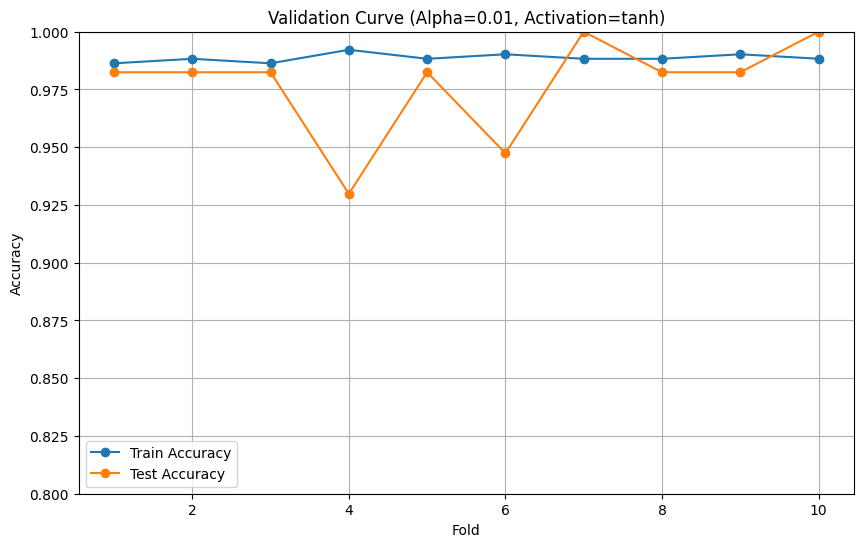

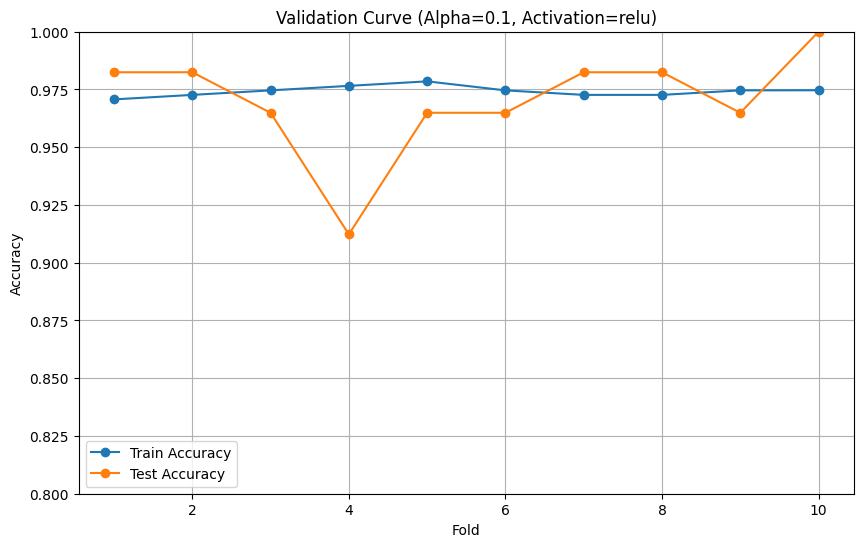

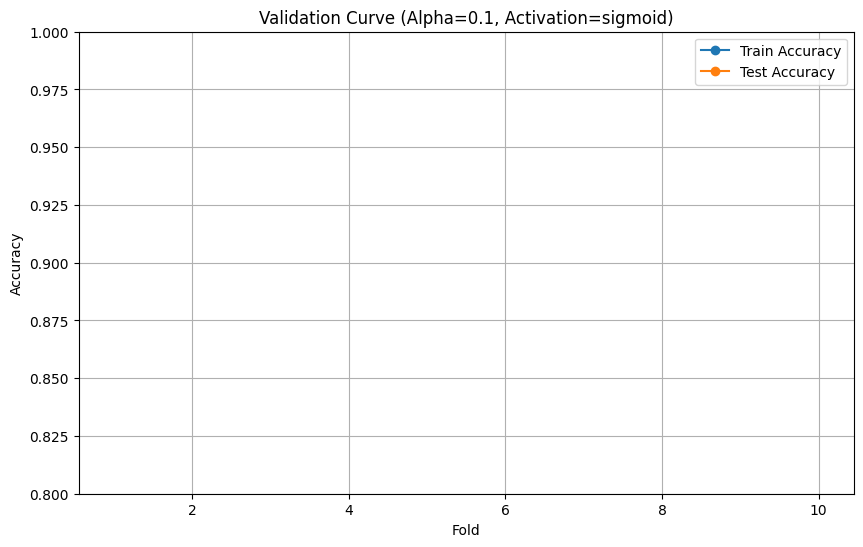

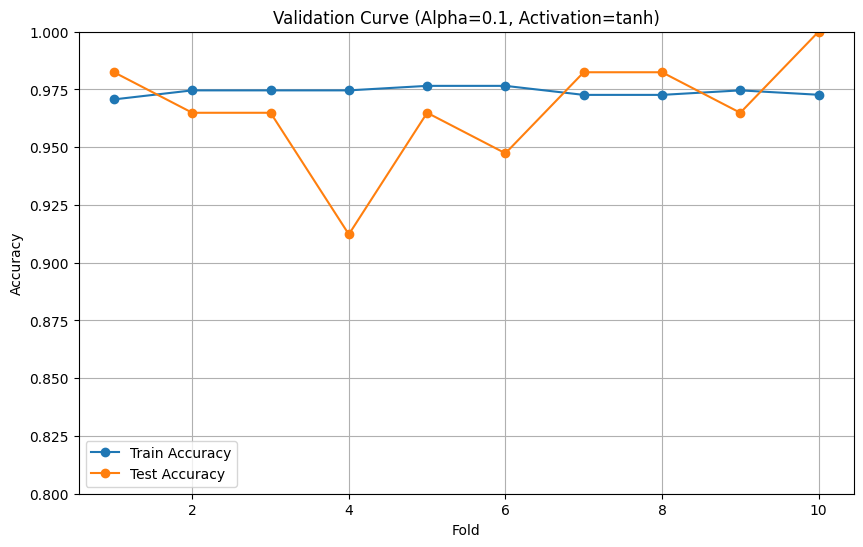

In [ ]:

# Carregar o conjunto de dados
data = load_breast_cancer()
X, y = data.data, data.target

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Configurações do experimento
alphas = [0.001, 0.01, 0.1]  # Valores de regularização
activations = ['relu', 'sigmoid', 'tanh']  # Funções de ativação
k = 10  # Número de folds
results = []

# Validação cruzada com StratifiedKFold
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Função para criar o modelo
def build_model(input_dim, alpha, activation):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(16, activation=activation, kernel_regularizer=l2(alpha)),
        Dense(8, activation=activation, kernel_regularizer=l2(alpha)),
        Dense(1, activation='sigmoid')  # Saída binária
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Loop pelos valores de alpha e funções de ativação
for alpha in alphas:
    for activation in activations:
        fold_train_acc = []
        fold_test_acc = []

        # Loop de validação cruzada
        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # Criar e treinar o modelo
            model = build_model(X_train.shape[1], alpha, activation)
            model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

            # Avaliar nos dados de treino e teste
            _, train_acc = model.evaluate(X_train, y_train, verbose=0)
            _, test_acc = model.evaluate(X_test, y_test, verbose=0)

            # Armazenar os resultados do fold
            fold_train_acc.append(train_acc)
            fold_test_acc.append(test_acc)

        # Armazenar resultados agregados
        results.append({
            'alpha': alpha,
            'activation': activation,
            'train_acc_mean': np.mean(fold_train_acc),
            'train_acc_std': np.std(fold_train_acc),
            'test_acc_mean': np.mean(fold_test_acc),
            'test_acc_std': np.std(fold_test_acc),
            'train_acc': fold_train_acc,
            'test_acc': fold_test_acc
        })

# Visualizar os resultados
for res in results:
    alpha = res['alpha']
    activation = res['activation']
    train_acc = res['train_acc']
    test_acc = res['test_acc']

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, k + 1), train_acc, marker='o', label='Train Accuracy')
    plt.plot(range(1, k + 1), test_acc, marker='o', label='Test Accuracy')
    plt.title(f"Validation Curve (Alpha={alpha}, Activation={activation})")
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.ylim(0.8, 1.0)
    plt.legend()
    plt.grid(True)
    plt.show()


1.	Gráficos de Acurácia:
o	Para cada combinação de α\alphaα e função de ativação, são gerados gráficos mostrando as acurácias de treino e teste em cada um dos 10 folds.
2.	Resumo Numérico:
o	Os resultados de acurácia média e desvio padrão são exibidos ao final para cada combinação de parâmetros.
3.	Visualização:
o	Os gráficos permitem identificar tendências específicas, como:
	Diferenças entre acurácias de treino e teste.
	Impacto de diferentes funções de ativação e valores de regularização.


O que Esperar nos Resultados

Valores de α:
Pequenos (α=0.001\alpha = 0.001α=0.001): Menor regularização, possível overfitting (alta acurácia de treino, menor no teste).
Médios (α=0.01\alpha = 0.01α=0.01): Bom equilíbrio entre viés e variância.
 Altos (α=0.1\alpha = 0.1α=0.1): Regularização forte, possível underfitting (baixa acurácia em ambos os conjuntos).

Funções de Ativação:
•	ReLU: Melhor desempenho geral, especialmente em redes profundas.
•	Sigmoid e Tanh: Potencial para saturar os gradientes em certas condições.
